## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

We wanted to work on this problem because we all really love the film Titanic. The Titanic was a British passenger ship which sank on April 15, 1912 after colliding with an iceberg. It was one of the largest and most luxurious ships at the time and considered to be a safe and unsinkable ship. It included amenities such as a swimming pool, gymnasium, and multiple dining options for passengers. This explains why the crew was not prepared for disaster; with 2,224 people on board, there was only enough lifeboats for half of the total amount of people, leading to the death of 1,500. The sinking of the Titanic led to significant changes in maritime safety regulations, including requiring ships to carry enough lifeboats for all passengers and crew and improving communication and navigation systems on board. The Titanic's story has been the subject of numerous books, movies, and documentaries, and has become a symbol of human hubris and the dangers of overconfidence in technology.

We would like to explore which people's lives were prioritized in this state of emergency, and which lives were not. This would give valuable insight into the social structure of British and American society during that time.

## Problem statement 

We would like to predict the survival of the passengers on the Titanic based on features of the passengers such as their class, gender, port of embarkation, cabin number, cost of fare, relatives on board, and age. 

This is a classification problem because we want to figure out whether or not the passengers survived, a qualitative response. This is more of an inference problem since we don't want to necessarily predict future deaths of passengers of the Titanic, something that won't happen again, but instead understand how each indepedent variable impacts the likelihood of that passenger dying. 

Since this is a classification problem, we obviously want to minimize the classification error rate, and hopefully achieve a model of at least 95% accuracy. Since we are not using this data to make any future predictions, we aren't necessarily interested in precision, recall, FNR, or TPR.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

The data we used is a Kaggle dataset found at this link: https://www.kaggle.com/competitions/titanic/data?select=test.csv
<br>
<br>
Our variable of interest is 'Survived' and the rest of the variables were considered as predictors. 
<br> 
<br>
Variable descriptions: 
<br> 
<br>
1. Survived: 0=No, 1=Yes
<br> 
2. Pclass: 1 = first class, 2 = second class, 3 = third class
<br> 
3. sibsp: number of siblings and spouses aboard Titanic
<br> 
4. parch: number of parents and children aboard Titanic
<br> 
5. ticket: ticket number
<br> 
6. fare: passenger fare
<br> 
7. cabin: cabin number
<br> 
8. embarked: port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton


## Stakeholders

We are mostly interested in understanding the background of a historical event, and if certain factors like sex or class could have decided on a person's life. This would help honor the victims of this tragic accident.

Additionally, for someone paranoid and scared of boatrides, it might help them feel prepared if they knew what helped people survive on the Titanic, so they could improve their chances of survival through fare, cabin placement, etc. as well

## Data quality check / cleaning / preparation 

The following variables were discarded as they did not provide any unique data; they were specific to each passenger
- PassengerId
- Name
- Ticket
- Cabin

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
train = pd.read_csv('../train.csv')
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

The frequency for the continuous variables is as follows:

In [96]:
df = train[['Age','Fare']].isnull().sum().reset_index().transpose().append(train[['Age','Fare']].nunique().reset_index().transpose())
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df = df.set_index([pd.Index(['# missing','# unique'])])
train[['Age','Fare']].describe().append(df)

,Age,Fare
count,714.0,891.0
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.42,0.0
25%,20.125,7.9104
50%,28.0,14.4542
75%,38.0,31.0
max,80.0,512.3292
# missing,177,0
# unique,88,248


The frequency table for the categorical variable "Survived":

In [97]:
df1=pd.crosstab(train['Survived'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0, ' '], '# unique': [2, ' ']}, index=[0, 1])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
0,549,0,2
1,342,,


The frequency table for the categorical variable "Pclass":

In [98]:
df1=pd.crosstab(train['Pclass'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0, ' ',' '], '# unique': [3, ' ',' ']}, index=[1,2,3])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
1,216,0,3
2,184,,
3,491,,


The frequency table for the categorical variable "Sex":

In [99]:
df1=pd.crosstab(train['Sex'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0, ' '], '# unique': [2, ' ']}, index=['female','male'])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
female,314,0,2
male,577,,


The frequency table for the categorical variable "SibSp":

In [100]:
df1=pd.crosstab(train['SibSp'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0,'','','','','',''], '# unique': [7,'','','','','','']}, index=[0,1,2,3,4,5,8])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
0,608,0,7
1,209,,
2,28,,
3,16,,
4,18,,
5,5,,
8,7,,


The frequency table for the categorical variable "Parch":

In [101]:
df1=pd.crosstab(train['Parch'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0,'','','','','',''], '# unique': [7,'','','','','','']}, index=[0,1,2,3,4,5,6])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
0,678,0,7
1,118,,
2,80,,
3,5,,
4,4,,
5,5,,
6,1,,


The frequency table for the categorical variable "Embarked"

In [102]:
df1=pd.crosstab(train['Embarked'], columns = 'count')
df2=pd.DataFrame(data={'# missing': [0,'',''], '# unique': [3,'','']}, index=['C','S','Q'])
pd.concat([df1,df2],axis=1)

,count,# missing,# unique
C,168,0,3
Q,77,,
S,644,,


The only data cleaning necessary for this dataset was the values of Age -- there were 177 missing values, and there was enough information for me to impute them. In order to impute the 177 values of Age, I decided to run a linear regression on all of the other variables and figure out if there was a model that could reliably predict values of Age. Hence, I made a model with Pclass, Sex, SibSp, Parch, Fare, and Embarked. I did some preliminary data analysis on those 6 variables on Age, and found that there was significant correlation between SibSp, Parch, and Pclass, but not Sex or Embarked. This is probably because Sex and Embarked would have a pretty evenly split age groups. The specific correlations can be seen in the Code section. 

To impute the values, I split the entire training dataset into two: one with all of the ages, and one without all of the ages. I ran my multiple linear regression on the dataset with all of the equations. I also edited the dataframe so that the variables SibSp, Parch, and Pclass were strings instead of integers, in order for the model to read them as categorical variables. I found that doing this improved the R-squared of my model drastically. I believe this is because these three variables only have discrete values (you can't have 4.5 siblings). I initially used the formula 'Age~SibSp+Parch+Pclass+Fare', and performed a residual analysis, as I found the R-squared value of 0.302 to be a bit unsatisfactory.

Text(0, 0.5, 'Residuals')

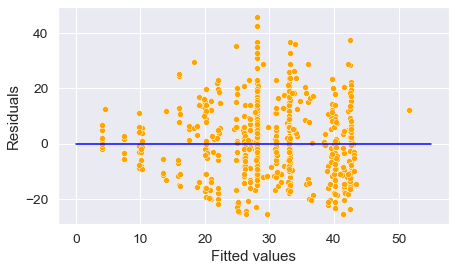

In [117]:
train['Pclass'] = train['Pclass'].apply(str)
train['Parch'] = train['Parch'].apply(str)
train['SibSp'] = train['SibSp'].apply(str)
missing_age = train[train['Age'].isna()] #dataframe containing only rows missing Age
has_age = train.dropna(subset=['Age']) #dataframe containing only no rows missing Age
ols_object = smf.ols(formula = 'Age~SibSp+Parch+Pclass+Fare', data = has_age)
model = ols_object.fit()
plt.rcParams["figure.figsize"] = (7,4)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [0,55],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Here, you can clearly see that the constant variance assumption is violated, and hence we must take a transformation of the response variable. I found that taking the square-root of age was able make the variance of the residuals a bit more constant.
Doing so improved the R-squared of this model to 0.349. As a last step, I checked to see if there were a need to remove any outliers, high leverage points, and influential points. I found 4 outliers, 35 high leverage points, and no influential points. Because there were no influential points, I decided not to remove any data from the model.

Text(0, 0.5, 'Residuals')

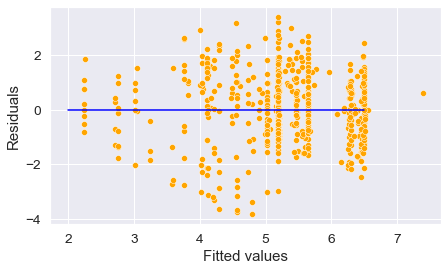

In [118]:
ols_object = smf.ols(formula = 'np.sqrt(Age)~SibSp+Parch+Pclass+Fare', data = has_age)
model_sqrt_age = ols_object.fit()
plt.rcParams["figure.figsize"] = (7,4)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model_sqrt_age.fittedvalues, y=model_sqrt_age.resid,color = 'orange')
sns.lineplot(x = [2,6.5],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

With this final model now set, I was now ready to impute the data on the part of the dataset that did not have values of Age. However, I immediately ran into an issue -- 7 datapoints had "SibSp" values of 8, but my model could only predict Ages of those with "SibSp" values from 0 to 5. Since "SibSp" has to do with the number of siblings and spouses, I hypothesized that the people who had a "SibSp" of 8 probably belonged to the same large family. I looked for these values in the dataframe and was correct! They call came from the Sage family.

In [119]:
train = pd.read_csv('../train.csv')
missing_age = train[train['Age'].isna()]
missing_age.loc[missing_age['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Since there were so few values, I decided to see if I could do enough historical research to hand impute these values. Indeed, I was able to find the birth years of all of the passengers, due to the fact that this historical event has a lot of research and archived materials. I was able to find: Stella (born 1891), George John (born 1892), Douglas Bullen (born 1894), Frederick (born 1895), Dorothy Florence (born 1897), Anthony William (born 1899), Elizabeth Ada (born 1901), Constance Gladys (born 1904), and Thomas Henry (born 1911). [1] With the fact that the Titanic sank in 1912, I was able to figure out their ages! 

## Exploratory data analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

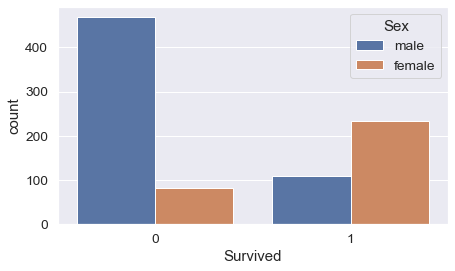

In [122]:
sns.countplot(x='Survived',data=train,hue='Sex')

From this, we find that the majority of people who died are men, and the majority of people who survived are female

<AxesSubplot:xlabel='Survived', ylabel='count'>

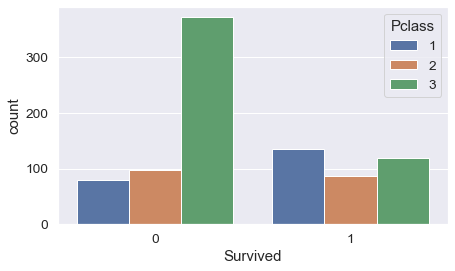

In [124]:
sns.countplot(x='Survived',data=train,hue='Pclass')

From this, we see that the majority of people who died was in the third class, but those who survived seem pretty evenly split between all classes

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

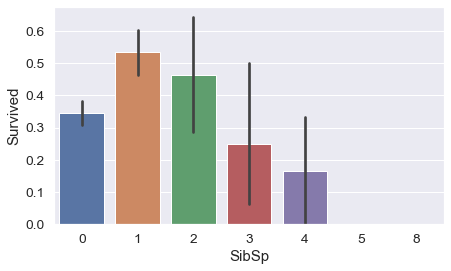

In [125]:
sns.barplot(x='SibSp',y='Survived',data=train)

From this, we find that smaller families are more likely to survive than larger families

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

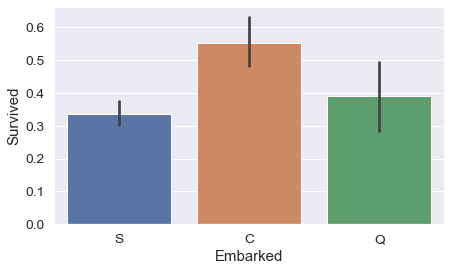

In [128]:
sns.barplot(x='Embarked',y='Survived',data=train)

From this, we find that there is some variation on survival rate based on which city they embarked on, which may be due to a correlation with class.

In [131]:
#Binning Age
binned_age = pd.cut(train['Age'],8,retbins=True)
train['age_binned'] = binned_age[0]
age_data = train.groupby('age_binned')['Survived'].agg([('survival_percent','mean'),('nobs','count')]).reset_index(drop=False)
age_data

,age_binned,survival_percent,nobs
0,"(0.34, 10.368]",0.593750,64
1,"(10.368, 20.315]",0.382609,115
2,"(20.315, 30.263]",0.365217,230
3,"(30.263, 40.21]",0.445161,155
4,"(40.21, 50.158]",0.383721,86
5,"(50.158, 60.105]",0.404762,42
6,"(60.105, 70.052]",0.235294,17
7,"(70.052, 80.0]",0.200000,5


Text(0.5, 0, 'Age_bin')

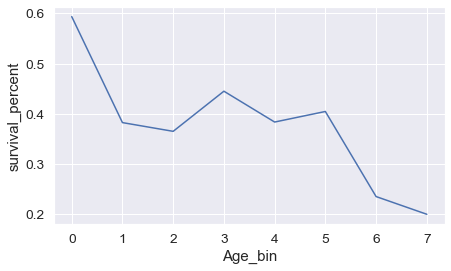

In [132]:
#Visualizing percentage of people having diabetes with increasing Age (or Age bins)
sns.lineplot(x = age_data.index, y= age_data['survival_percent'])
plt.xlabel('Age_bin')

From here, we find that the older the passenger, the less likely they were able to survive.

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

## GitHub and individual contribution {-}

Github link: https://github.com/davenator-git/Data_Science_303-2_Venator/tree/main

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Jazmyn Lu</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>###</td>
  </tr>
  <tr>
    <td>David Venator</td>
    <td>Variable Selection </td>
    <td>describe what you did here davenator</td>
    <td>###</td>
  </tr>
    <tr>
    <td>Hiba Khatib and Emily Leibfritz</td>
    <td>Exhaustive Variable Selection, minimal data cleaning, fitting models, performance measurement</td>
    <td>describe stuff here</td>
    <td>###</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}

[1] The National Archives, “Stories from the Titanic - Safe Family,” 01-Mar-2012. [Online]. Available: https://www.nationalarchives.gov.uk/titanic/stories/sage-family.htm. [Accessed: 3-Mar-2023]. 

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.